In [1]:
from __future__ import division, print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
#mengimport library yg digunakan untuk load data excel dan library lainnya yg digunakan untuk proses clustering

In [55]:
dataset = pd.read_excel("datafix.xlsx")
dataset.head()

,SNo,BookingDate,BookingMonth,ID,STTNo,Shipper,OriginCity,DestinationCity,ForwardArea,Product,GrossWt,VolumeWt,CommodityName,LastTrackingStatus
0,110459075,2018-03-01,3,JOG-1932,10-17-1617709,DEE,JOG31,12,NaN,REGPACK,7,3,PRODUCT COSMETICS NON LIQUID,RECEIPT BY RIA .
1,110459088,2018-03-01,3,JOG-1932,10-17-1617711,DEE,JOG31,35,NaN,REGPACK,1,1,PRODUCT COSMETICS NON LIQUID,RECEIPT BY NURFAN .
2,110459140,2018-03-01,3,JOG-1932,10-17-1617647,MEC ARTUR,JOG31,92,NaN,REGPACK,2,1,ACCESSORIES,RECEIPT BY ANDRY TRIAS .
3,110459171,2018-03-01,3,JOG-1932,11-18-315622,MELVIN,JOG31,81,NaN,ONEPACK,1,1,ACCESSORIES,RECEIPT BY SANCHIA AHULUHELUW .
4,110459198,2018-03-01,3,JOG-1932,10-17-1617708,VINDY SHOP,JOG31,74,NaN,REGPACK,1,1,PRODUCT COSMETICS NON LIQUID,RECEIPT BY HESTI .


In [56]:
df = dataset[['BookingMonth', 'DestinationCity', 'Product', 'GrossWt', 'VolumeWt']]
df = df.dropna(axis=0, how='any')
df.columns = ['BookingMonth', 'DestinationCity', 'Product', 'Gross', 'Volume']
df.head()

,BookingMonth,DestinationCity,Product,Gross,Volume
0,3,12,REGPACK,7,3
1,3,35,REGPACK,1,1
2,3,92,REGPACK,2,1
3,3,81,ONEPACK,1,1
4,3,74,REGPACK,1,1


In [57]:
df.loc[df['Product'] == 'REGPACK', 'Product'] = 2
df.loc[df['Product'] == 'ONEPACK', 'Product'] = 1
df.head()

,BookingMonth,DestinationCity,Product,Gross,Volume
0,3,12,2,7,3
1,3,35,2,1,1
2,3,92,2,2,1
3,3,81,1,1,1
4,3,74,2,1,1


In [58]:
sample = df.sample(400)
sample.head(10)

,BookingMonth,DestinationCity,Product,Gross,Volume
3141,7,82,2,1,1
3150,7,81,2,1,1
3502,7,53,2,5,5
4229,8,82,2,1,1
4298,8,14,2,1,2
210,3,92,2,6,5
3146,7,92,2,1,1
1415,4,92,2,1,1
3498,7,53,2,5,2
3277,7,74,2,4,4


In [59]:
df.iterrows()

<generator object DataFrame.iterrows at 0x1a23903d50>

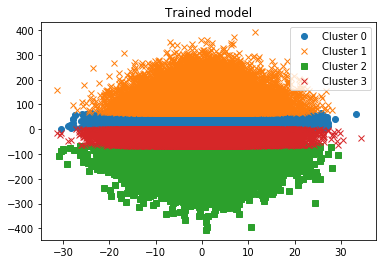

In [63]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
apts = np.zeros(1)
bpts = np.zeros(1)
cpts = np.zeros(1)
dpts = np.zeros(1)
epts = np.zeros(1)

for i, x in df.iterrows():
    apts = np.hstack((apts, np.random.standard_normal(100) * x['BookingMonth']))
    bpts = np.hstack((bpts, np.random.standard_normal(100) * x['DestinationCity']))
    cpts = np.hstack((cpts, np.random.standard_normal(100) * x['Product']))
    dpts = np.hstack((dpts, np.random.standard_normal(100) * x['Gross']))
    epts = np.hstack((epts, np.random.standard_normal(100) * x['Volume']))
    
# Visualize the test data 
alldata = np.vstack((apts, bpts, cpts, dpts, epts))

n_cluster = 4
cntr, u_orig, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data=alldata, c=n_cluster,
                                                 m=2, error=0.005, maxiter=100)

# Show 3-cluster model
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
symbols = ['o','x','s', 'x', 'x', 'd']
for j in range(n_cluster):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], symbols[j],
             label='Cluster ' + str(j))
ax2.legend()

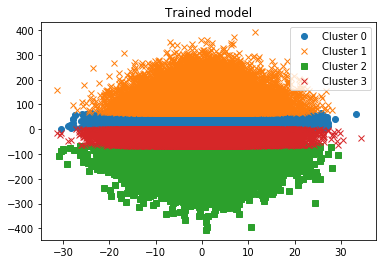

In [61]:
fig2

In [72]:
from io import BytesIO
figfile = BytesIO()
fig2.savefig(figfile, format='png')
figfile.seek(0)  # rewind to beginning of file
import base64
#figdata_png = base64.b64encode(figfile.read())
figdata_png = base64.b64encode(figfile.getvalue())
str(figdata_png, 'utf-8', 'ignore')

/Users/piinalpin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  This is separate from the ipykernel package so we can avoid doing imports until


'iVBORw0KGgoAAAANSUhEUgAAAbAAAAEgCAYAAADVKCZpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOydeXwU9f3/n7O7uUhCDs6QcCQEFAIRLMghYADRShUR0WCxgqKo/SEqrUWLba1Viz1ALNZ+U7GgQFHBghfiwSWnhvtQDBAgCXcOICHHHvP7472zVzYhCQk5+DwfD9jdmdnZye7MvD7v9+d9aLqu6ygUCoVC0cgw1fcBKBQKhUJRE5SAKRQKhaJRogRMoVAoFI0SJWAKhUKhaJQoAVMoFApFo0QJmEKhUCgaJUrAFAqFQtEoUQKmUCgUikaJEjCFQqFQNEqUgCkUCoWiUaIETKFQKBSNEiVgCoVCoWiUKAFTKBQKRaNECZhCoVAoGiVKwBQKhULRKFECplAoFIpGiRIwhUKhUDRKlIApFAqFolGiBEyh8IPdbicsLIxjx47V+r7feustUlJSan2/VSEuLo61a9decruDBw+iaVrdH5BCcRkoAVM0CcLCwlz/TCYTISEhrteLFi2q9v7MZjOFhYV06NChDo5WoVDUBpb6PgCFojYoLCx0Pe/UqRNvvfUWN998c4Xb22w2LBZ1+isUjRllgSmuCp5//nlSU1O57777CA8PZ+HChWzevJn+/fsTGRlJTEwMU6dOxWq1AiJwmqZx5MgRAO6//36mTp3KbbfdRnh4OAMGDCAzM9O1//3793PzzTcTHR3Ntddey7Jly1zrzpw5w+23307z5s3p37+/1/t8MVx38+fPJy4ujujoaP7973+zdetWevbsSWRkJE8++aRre4fDwYsvvkjHjh1p3bo1EydO5Pz586718+fPp2PHjrRs2ZKZM2d6fZbD4eCVV16hc+fOtGz

In [31]:
len(sample)

400

In [32]:
len(alldata)

5

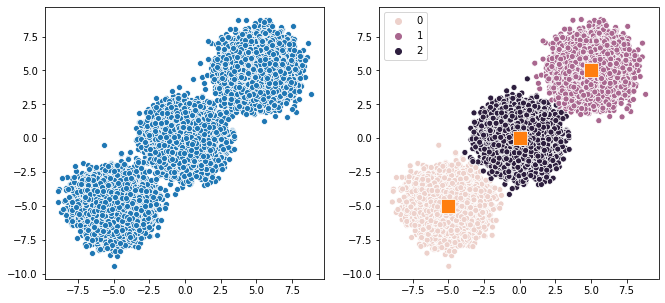

In [34]:
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter


# create artifitial dataset
n_samples = 50000
n_bins = 3  # use 3 bins for calibration_curve as we have 3 clusters here
centers = [(-5, -5), (0, 0), (5, 5)]

X,_ = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

# fit the fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(X)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)


# plot result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(X[:,0], X[:,1], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
plt.show()